In [26]:
import numpy as np
import pandas as pd
from pynverse import inversefunc
from matplotlib import pyplot as plt

In [27]:
def probability_to_entropy(probability):
    """Entropy of a binomial system
    
    Inputs:
    probability (float)
    
    Outputs:
    entropy (float)"""

    entropy = - probability*(np.log(probability)) - (1-probability)*(np.log(1-probability))

    return entropy

def entropy_to_probability(entropy):

    """Gives the probability of getting a correct answer given the entropy experienced by an agent
    
    Inputs:
    entropy (float)
    
    Outputs:
    probability (float)"""
    assert 0 <= entropy <= np.log(2)

    probability = inversefunc(probability_to_entropy, y_values=entropy, domain=[0.5, 0.99999])

    return probability


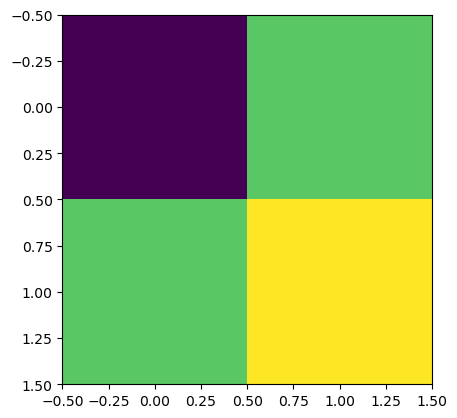

In [28]:
num_agents = 2

assert type(num_agents) == int

matrix_dims = tuple(2 for i in range(num_agents))

information_matrix = np.zeros(matrix_dims)

information_matrix = [[0.01, 0.3], [0.3, 0.4]]

plt.imshow(information_matrix)
plt.show()

# This matrix encodes the information contained in each combination of signals. For example, the value at location 101 would indicate the information contained in the combination of the first and third signal

vectorized_entropy_to_probability = np.vectorize(entropy_to_probability)

probability_matrix = vectorized_entropy_to_probability(information_matrix)

In [54]:
rewards = (0,2)

def kelly_betting(rewards, probability):
    f = (probability/(1-rewards[0])) - (1-probability)/(rewards[1]-1)
    return f

def simulate_wealth_step(agent_probabilities, agent_wagers, original_wealth, rewards = (0,2)): 
    rand = np.random.rand(1)
    if agent_probabilities > rand:
        new_wealth = (original_wealth+agent_wagers*(rewards[1]-1))
    else:
        new_wealth = (original_wealth+agent_wagers*(rewards[0]-1))
    return new_wealth


def simulate_wealth_progression(simulation_length, agent_probabilities, agent_wagers, rewards = (0,2)): 
    random_vector = np.random.rand(simulation_length)
    agent_wealth = [1]
    for i in range(simulation_length):
        if agent_probabilities[i] > random_vector[i]:
            agent_wealth.append(agent_wealth[i]+agent_wealth[i]*agent_wagers[i]*(rewards[1]-1))
        else:
            agent_wealth.append(agent_wealth[i]+agent_wealth[i]*agent_wagers[i]*(rewards[0]-1))
    return agent_wealth

In [67]:
simulation_length = 100
agent_probabilities = np.ones((simulation_length))*0.9
agent_wagers = np.zeros((simulation_length))

for i in range(len(agent_wagers)):
    agent_wagers[i] = kelly_betting(rewards=rewards, probability=agent_probabilities[i])

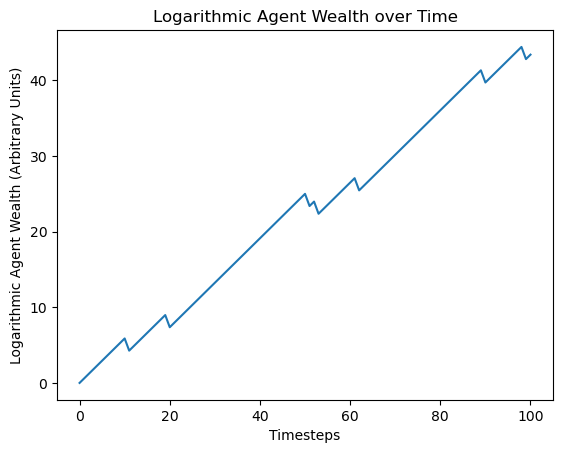

In [68]:
wealth = simulate_wealth_progression(simulation_length=simulation_length, agent_probabilities=agent_probabilities, agent_wagers=agent_wagers)

log_wealth = np.log(wealth)

plt.plot(log_wealth)
plt.title("Logarithmic Agent Wealth over Time")
plt.xlabel("Timesteps")
plt.ylabel("Logarithmic Agent Wealth (Arbitrary Units)")
plt.show()